# Repeated Renting Exploration  
In this notebook, I will explore instances where a customer rents the same outfit more than once.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt

#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
orders=pd.read_parquet(path+'/archive/data/orders.parquet',engine='pyarrow')
orders.head()

,customer.id,outfit.id,rentalPeriod.start,rentalPeriod.end
0,3945,outfit.923f3fd476b5450b9582d1f525604546,2018-05-25,2018-05-28
1,4088,outfit.8c8e922e228ba03f,2019-08-29,2019-09-02
2,4360,outfit.96f152543e7668ae,2018-08-10,2018-08-13
3,4697,outfit.ddba05a5ced34fa1ab3a0722c05bb11a,2018-06-14,2018-06-19
4,3890,outfit.5ef01d4dc15243fb854ca797716fd663,2019-08-24,2019-08-27


In [ ]:
outfits=pd.read_parquet(path+'/archive/data/outfits.parquet',engine='pyarrow')
outfits.head()

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [ ]:
orders=orders.merge(outfits[['id','group']],left_on='outfit.id',right_on='id').drop(columns='id')
orders.head()

,customer.id,outfit.id,rentalPeriod.start,rentalPeriod.end,group
0,3945,outfit.923f3fd476b5450b9582d1f525604546,2018-05-25,2018-05-28,group.6f394f7e504a39f26ca691fb02e5ed22
1,4088,outfit.8c8e922e228ba03f,2019-08-29,2019-09-02,group.9e3f83b7a4adb80992eee691fc83403f
2,4360,outfit.96f152543e7668ae,2018-08-10,2018-08-13,group.32ebcc4a2acfe62819949bb3b6c9256b
3,4697,outfit.ddba05a5ced34fa1ab3a0722c05bb11a,2018-06-14,2018-06-19,group.27f89b2927dbb3def926fa21ac1bdd26
4,3890,outfit.5ef01d4dc15243fb854ca797716fd663,2019-08-24,2019-08-27,group.9ba8ee768fcc2ca9c7dee05b23b7daa0


In [ ]:
del outfits
gc.collect()

62

In [ ]:
orders.columns

Index(['customer.id', 'outfit.id', 'rentalPeriod.start', 'rentalPeriod.end',
       'group'],
      dtype='object')

In [ ]:
# Group by customer.id and outfit.id and count the number of rentals
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='count')

# Filter customers who rented the same outfit more than once
multiple_rentals = rental_counts[rental_counts['count'] > 1]

# Get the number of unique customers who rented the same outfit more than once
num_customers_multiple_rentals = multiple_rentals['customer.id'].nunique()

print(f"The number of customers who rented the same outfit more than once is {num_customers_multiple_rentals}.")

# Get the total number of unique customers
total_customers = orders['customer.id'].nunique()

# Calculate the percentage of customers who rented the same outfit more than once
percentage_multiple_rentals = (num_customers_multiple_rentals / total_customers) * 100

print(f"The percentage of customers who rented the same outfit more than once is {percentage_multiple_rentals:.2f}%.")

The number of customers who rented the same outfit more than once is 1188.
The percentage of customers who rented the same outfit more than once is 16.03%.


In [ ]:
# Count the number of outfits rented by the same customer more than once
outfits_rented_multiple_times = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='count')
outfits_rented_multiple_times = outfits_rented_multiple_times[outfits_rented_multiple_times['count'] > 1]

# Calculate the percentage of outfits rented multiple times
total_outfits = orders['outfit.id'].nunique()
multiple_rented_outfits = outfits_rented_multiple_times['outfit.id'].nunique()
percentage_multiple_rented_outfits = (multiple_rented_outfits / total_outfits) * 100

print(f"Number of outfits rented by the same customer more than once: {multiple_rented_outfits}")
print(f"Percentage of outfits rented multiple times: {percentage_multiple_rented_outfits:.2f}%")

Number of outfits rented by the same customer more than once: 3639
Percentage of outfits rented multiple times: 29.91%


In [ ]:
# Calculate the number of orders for outfits that customers have already rented
orders_multiple_rentals = orders[orders.duplicated(subset=['customer.id', 'outfit.id'], keep=False)]

# Calculate the percentage of these orders from the total orders
percentage_orders_multiple_rentals = (len(orders_multiple_rentals) / len(orders)) * 100

print(f"The number of orders for outfits that customers have already rented is {len(orders_multiple_rentals)}.")
print(f"The percentage of these orders from the total orders is {percentage_orders_multiple_rentals:.2f}%.")

The number of orders for outfits that customers have already rented is 11454.
The percentage of these orders from the total orders is 15.13%.


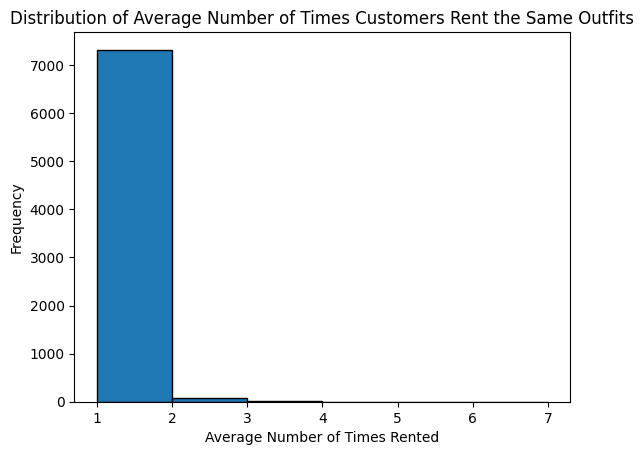

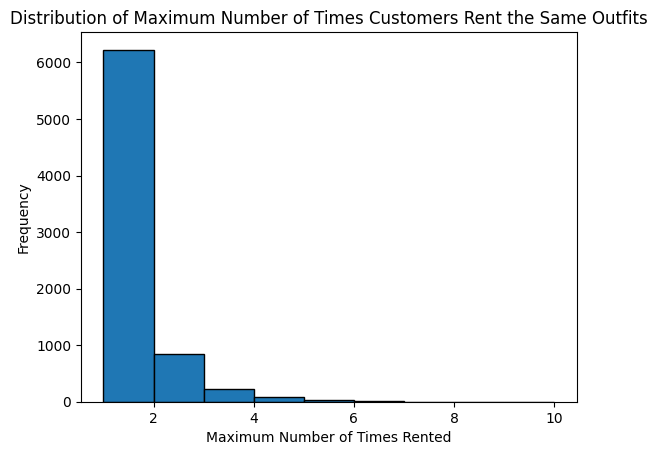

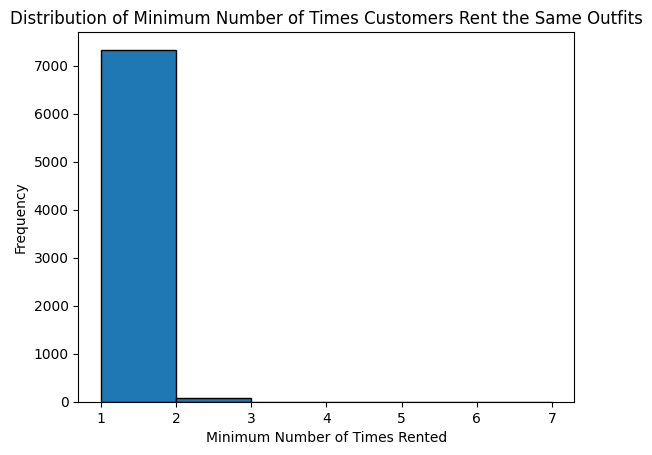

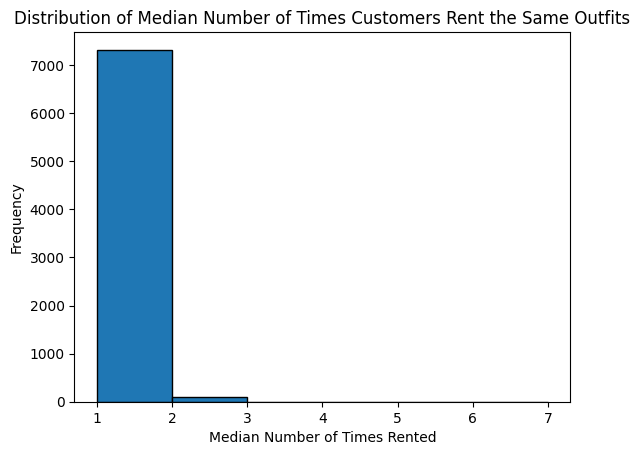

In [ ]:
# Calculate the number of times each customer rented each outfit
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='rental_count')

# Calculate the average, maximum, minimum, and median number of times each customer rented the same outfits
avg_rental_counts = rental_counts.groupby('customer.id')['rental_count'].mean().reset_index(name='avg_rental_count')
max_rental_counts = rental_counts.groupby('customer.id')['rental_count'].max().reset_index(name='max_rental_count')
min_rental_counts = rental_counts.groupby('customer.id')['rental_count'].min().reset_index(name='min_rental_count')
median_rental_counts = rental_counts.groupby('customer.id')['rental_count'].median().reset_index(name='median_rental_count')

# Plot the distribution of the average rental counts
plt.hist(avg_rental_counts['avg_rental_count'], bins=range(1, int(avg_rental_counts['avg_rental_count'].max()) + 2), edgecolor='black')
plt.xlabel('Average Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Times Customers Rent the Same Outfits')
plt.show()

# Plot the distribution of the maximum rental counts
plt.hist(max_rental_counts['max_rental_count'], bins=range(1, int(max_rental_counts['max_rental_count'].max()) + 2), edgecolor='black')
plt.xlabel('Maximum Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Number of Times Customers Rent the Same Outfits')
plt.show()

# Plot the distribution of the minimum rental counts
plt.hist(min_rental_counts['min_rental_count'], bins=range(1, int(min_rental_counts['min_rental_count'].max()) + 2), edgecolor='black')
plt.xlabel('Minimum Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Number of Times Customers Rent the Same Outfits')
plt.show()

# Plot the distribution of the median rental counts
plt.hist(median_rental_counts['median_rental_count'], bins=range(1, int(median_rental_counts['median_rental_count'].max()) + 2), edgecolor='black')
plt.xlabel('Median Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Median Number of Times Customers Rent the Same Outfits')
plt.show()

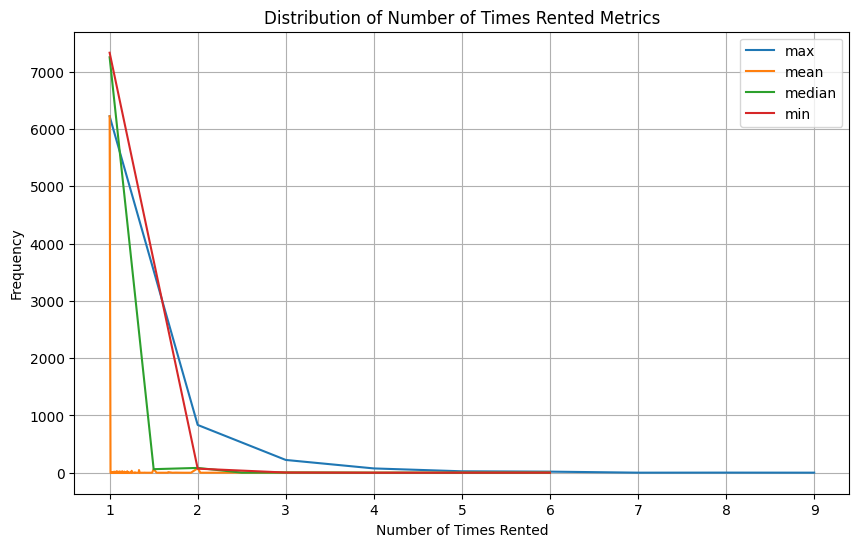

In [ ]:
# Calculate the number of times each customer rents each outfit
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='rental_count')

# Calculate the average, maximum, minimum, and median for each customer
customer_stats = rental_counts.groupby('customer.id')['rental_count'].agg(['mean', 'max', 'min', 'median']).reset_index()

# Calculate the distribution of how many customers have each metric
distribution = customer_stats.melt(id_vars='customer.id', value_vars=['mean', 'max', 'min', 'median'], var_name='metric', value_name='value')
distribution_counts = distribution.groupby(['metric', 'value']).size().reset_index(name='frequency')

# Plot the distribution
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.plot(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics')
plt.legend()
plt.grid(True)
plt.show()


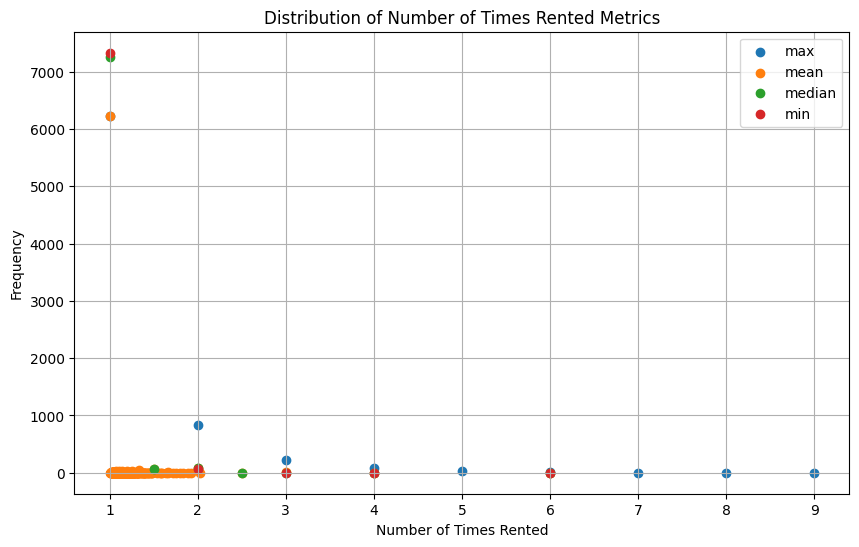

In [ ]:
# Plot the distribution as a scatter plot
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.scatter(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics')
plt.legend()
plt.grid(True)
plt.show()


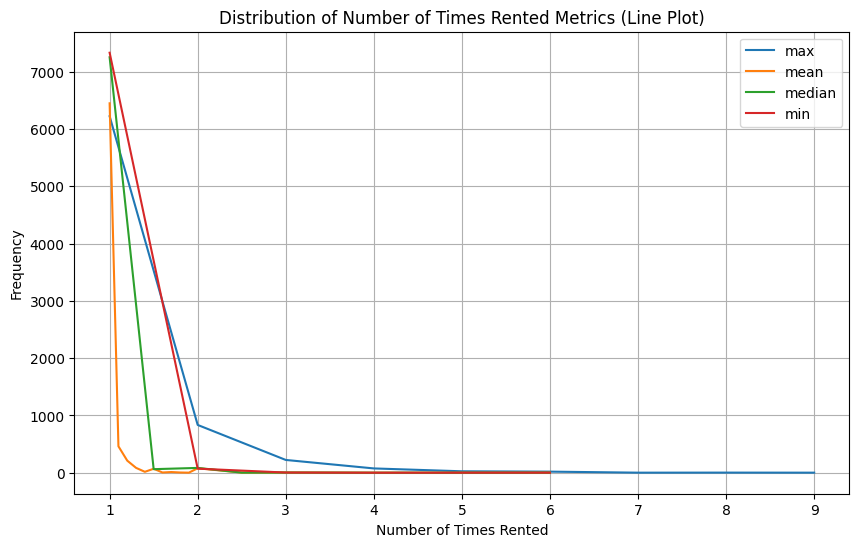

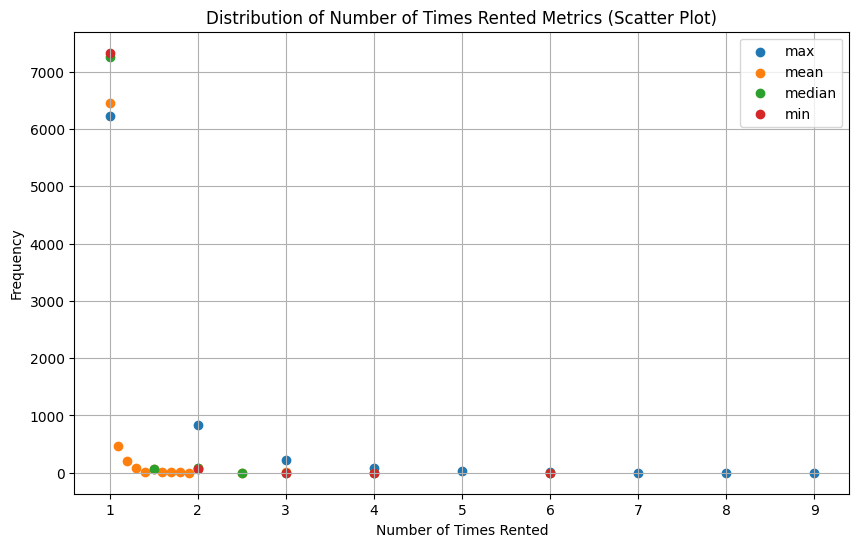

In [ ]:
#Round the plot

# Calculate the number of times each customer rents each outfit
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='rental_count')

# Calculate the average, maximum, minimum, and median for each customer
customer_stats = rental_counts.groupby('customer.id')['rental_count'].agg(['mean', 'max', 'min', 'median']).reset_index()

# Round the metrics to one digit after the dot
customer_stats = customer_stats.round({'mean': 1, 'max': 1, 'min': 1, 'median': 1})

# Calculate the distribution of how many customers have each metric
distribution = customer_stats.melt(id_vars='customer.id', value_vars=['mean', 'max', 'min', 'median'], var_name='metric', value_name='value')
distribution_counts = distribution.groupby(['metric', 'value']).size().reset_index(name='frequency')

# Plot the distribution as a line plot
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.plot(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution as a scatter plot
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.scatter(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()

Number of customers removed: 6224


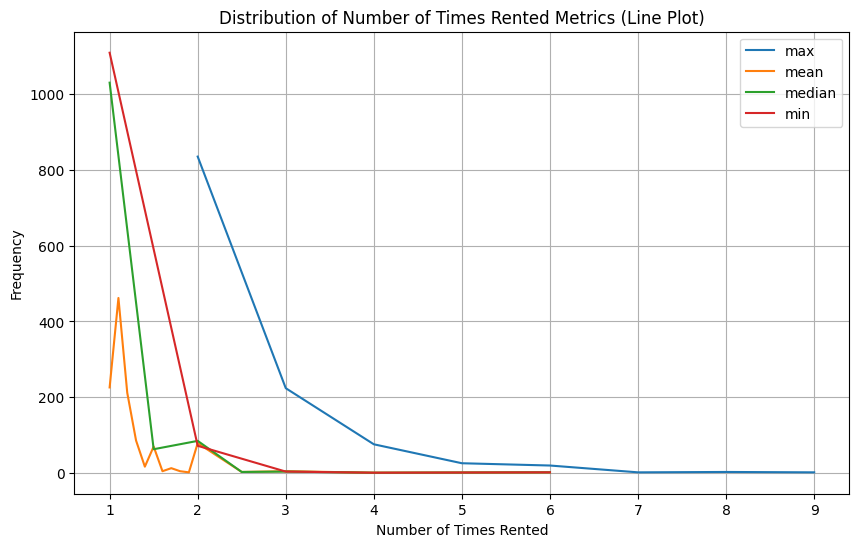

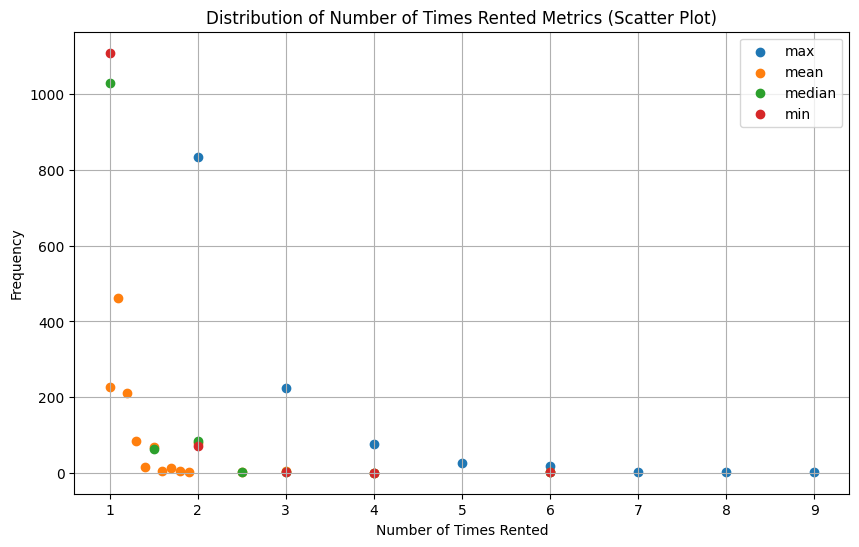

In [ ]:
#Remove Customers that don't rent more then once

# Calculate the number of times each customer rents each outfit
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='rental_count')

# Calculate the average, maximum, minimum, and median for each customer
customer_stats = rental_counts.groupby('customer.id')['rental_count'].agg(['mean', 'max', 'min', 'median']).reset_index()

# Remove all customers with max rental count of one
initial_count = customer_stats.shape[0]
customer_stats = customer_stats[customer_stats['max'] > 1]
removed_count = initial_count - customer_stats.shape[0]

print(f"Number of customers removed: {removed_count}")

# Round the metrics to one digit after the dot
customer_stats = customer_stats.round({'mean': 1, 'max': 1, 'min': 1, 'median': 1})

# Calculate the distribution of how many customers have each metric
distribution = customer_stats.melt(id_vars='customer.id', value_vars=['mean', 'max', 'min', 'median'], var_name='metric', value_name='value')
distribution_counts = distribution.groupby(['metric', 'value']).size().reset_index(name='frequency')

# Plot the distribution as a line plot
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.plot(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution as a scatter plot
plt.figure(figsize=(10, 6))
for metric in distribution_counts['metric'].unique():
    metric_data = distribution_counts[distribution_counts['metric'] == metric]
    plt.scatter(metric_data['value'], metric_data['frequency'], label=metric)

plt.xlabel('Number of Times Rented')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times Rented Metrics (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()


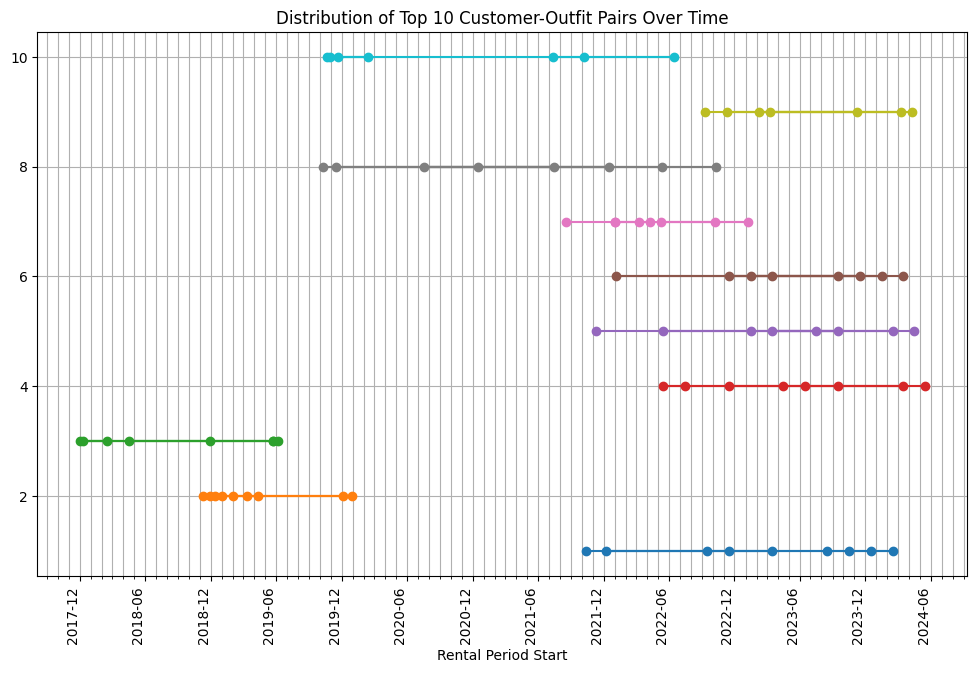

In [ ]:
# Find the top 10 most common pairs of customer.id and outfit.id
top_pairs = orders.groupby(['customer.id', 'outfit.id']).size().nlargest(10).reset_index(name='count')

# Filter the orders dataframe to include only the top pairs
filtered_orders = orders.merge(top_pairs[['customer.id', 'outfit.id']], on=['customer.id', 'outfit.id'])

# Plot the distribution of each pair over time
plt.figure(figsize=(12, 8))
for i, pair in enumerate(top_pairs.itertuples(), start=1):
    pair_orders = filtered_orders[(filtered_orders['customer.id'] == pair._1) & (filtered_orders['outfit.id'] == pair._2)]
    plt.plot(pair_orders['rentalPeriod.start'], [i]*len(pair_orders), label=f'Customer {pair._1} - Outfit {pair._2}', marker='o')

plt.xlabel('Rental Period Start')
plt.title('Distribution of Top 10 Customer-Outfit Pairs Over Time')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.grid(which='both')
plt.show()

In [ ]:
# Filter out orders that end before 1-1-2020
orders = orders[orders['rentalPeriod.end'] >= '2020-01-01']

In [ ]:
# Group by customer.id and outfit.id and count the number of rentals
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='count')

# Filter customers who rented the same outfit more than once
multiple_rentals = rental_counts[rental_counts['count'] > 1]

# Get the number of unique customers who rented the same outfit more than once
num_customers_multiple_rentals = multiple_rentals['customer.id'].nunique()

print(f"The number of customers who rented the same outfit more than once is {num_customers_multiple_rentals}.")

# Get the total number of unique customers
total_customers = orders['customer.id'].nunique()

# Calculate the percentage of customers who rented the same outfit more than once
percentage_multiple_rentals = (num_customers_multiple_rentals / total_customers) * 100

print(f"The percentage of customers who rented the same outfit more than once is {percentage_multiple_rentals:.2f}%.")

The number of customers who rented the same outfit more than once is 862.
The percentage of customers who rented the same outfit more than once is 30.13%.


In [ ]:
# Calculate the number of orders for outfits that customers have already rented
orders_multiple_rentals = orders[orders.duplicated(subset=['customer.id', 'outfit.id'], keep=False)]

# Calculate the percentage of these orders from the total orders
percentage_orders_multiple_rentals = (len(orders_multiple_rentals) / len(orders)) * 100

print(f"The number of orders for outfits that customers have already rented is {len(orders_multiple_rentals)}.")
print(f"The percentage of these orders from the total orders is {percentage_orders_multiple_rentals:.2f}%.")

The number of orders for outfits that customers have already rented is 9919.
The percentage of these orders from the total orders is 15.43%.


In [ ]:
# Filter out orders that end before 1-1-2021
orders = orders[orders['rentalPeriod.end'] >= '2021-01-01']

In [ ]:
# Group by customer.id and outfit.id and count the number of rentals
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='count')

# Filter customers who rented the same outfit more than once
multiple_rentals = rental_counts[rental_counts['count'] > 1]

# Get the number of unique customers who rented the same outfit more than once
num_customers_multiple_rentals = multiple_rentals['customer.id'].nunique()

print(f"The number of customers who rented the same outfit more than once is {num_customers_multiple_rentals}.")

# Get the total number of unique customers
total_customers = orders['customer.id'].nunique()

# Calculate the percentage of customers who rented the same outfit more than once
percentage_multiple_rentals = (num_customers_multiple_rentals / total_customers) * 100

print(f"The percentage of customers who rented the same outfit more than once is {percentage_multiple_rentals:.2f}%.")

The number of customers who rented the same outfit more than once is 802.
The percentage of customers who rented the same outfit more than once is 36.69%.


In [ ]:
# Calculate the number of orders for outfits that customers have already rented
orders_multiple_rentals = orders[orders.duplicated(subset=['customer.id', 'outfit.id'], keep=False)]

# Calculate the percentage of these orders from the total orders
percentage_orders_multiple_rentals = (len(orders_multiple_rentals) / len(orders)) * 100

print(f"The number of orders for outfits that customers have already rented is {len(orders_multiple_rentals)}.")
print(f"The percentage of these orders from the total orders is {percentage_orders_multiple_rentals:.2f}%.")

The number of orders for outfits that customers have already rented is 9342.
The percentage of these orders from the total orders is 15.51%.


In [ ]:
# Filter out orders that end before 1-1-2022
orders = orders[orders['rentalPeriod.end'] >= '2022-01-01']

In [ ]:
# Group by customer.id and outfit.id and count the number of rentals
rental_counts = orders.groupby(['customer.id', 'outfit.id']).size().reset_index(name='count')

# Filter customers who rented the same outfit more than once
multiple_rentals = rental_counts[rental_counts['count'] > 1]

# Get the number of unique customers who rented the same outfit more than once
num_customers_multiple_rentals = multiple_rentals['customer.id'].nunique()

print(f"The number of customers who rented the same outfit more than once is {num_customers_multiple_rentals}.")

# Get the total number of unique customers
total_customers = orders['customer.id'].nunique()

# Calculate the percentage of customers who rented the same outfit more than once
percentage_multiple_rentals = (num_customers_multiple_rentals / total_customers) * 100

print(f"The percentage of customers who rented the same outfit more than once is {percentage_multiple_rentals:.2f}%.")

The number of customers who rented the same outfit more than once is 697.
The percentage of customers who rented the same outfit more than once is 38.40%.


In [ ]:
# Calculate the number of orders for outfits that customers have already rented
orders_multiple_rentals = orders[orders.duplicated(subset=['customer.id', 'outfit.id'], keep=False)]

# Calculate the percentage of these orders from the total orders
percentage_orders_multiple_rentals = (len(orders_multiple_rentals) / len(orders)) * 100

print(f"The number of orders for outfits that customers have already rented is {len(orders_multiple_rentals)}.")
print(f"The percentage of these orders from the total orders is {percentage_orders_multiple_rentals:.2f}%.")

The number of orders for outfits that customers have already rented is 7632.
The percentage of these orders from the total orders is 15.40%.
